# Descriptive Statistics Review

## Avant de commencer :

- Lisez le fichier `README.md`
- Commentez autant que possible
- Bon apprentissage !


## Context

![img](./diamonds.jpg)

Dans ce laboratoire, nous allons travailler avec des données pour comprendre quelles caractéristiques d’un diamant ont le plus de chances d’influencer son prix.  
Dans cette première partie du labo, nous allons explorer et nettoyer nos données.

Le jeu de données que nous allons utiliser comprend environ 54 000 lignes et 11 colonnes différentes.  
Comme toujours, une ligne représente une seule observation (dans ce cas, un diamant) et chaque colonne représente une caractéristique distincte du diamant.

Le dictionnaire de données suivant (codebook) est fourni avec le jeu de données pour clarifier ce que chaque colonne représente :


| Colonne  | Description  |
|---|---|
| Price  | Prix en dollars américains (326–18 823)  |
| Carat  | Poids du diamant en carats (0,2–5,01)  |
| Cut  | Qualité de la taille (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Couleur du diamant, de J (pire) à D (meilleure)  |
| Clarity  | Mesure de la pureté du diamant (I1 (pire), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (meilleure))  |
| x  | Longueur en mm (0–10,74)  |
| y  | Largeur en mm (0–58,9)  |
| z  | Profondeur en mm (0–31,8)  |
| Depth  | Pourcentage de profondeur totale = z / moyenne(x, y) = 2 × z / (x + y) (43–79)  |
| Table  | Largeur du sommet du diamant par rapport au point le plus large (43–95)  |


## Bibliothèques

Pandas et numpy seront nécessaires pour l’analyse des données.  
Ne vous inquiétez pas pour l’import de seaborn et matplotlib pour le moment, vous en apprendrez davantage à leur sujet la semaine prochaine, mais nous utiliserons quand même certaines de leurs fonctionnalités.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Commencez par importer les données depuis le fichier `.csv` fourni et assignez-les à une variable nommée `diamonds`.  
Supprimez ensuite la colonne contenant l’index.


In [2]:
#your code here
diamonds = pd.read_csv('diamonds.csv')

# 1. Premier aperçu des données

Voyons à quoi ressemblent les données en utilisant des méthodes pandas comme `head()`, `info()` et `describe()`.

**Commencez par utiliser la méthode `head`.**


In [3]:
#your code here
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Nous pouvons afficher les 5 premières lignes du jeu de données en utilisant la méthode `head`.  
Cela ne nous en dit pas encore beaucoup sur les données que nous avons, mais cela nous permet d’avoir un premier aperçu des variables (colonnes) et de quelques valeurs que chacune contient.

**Que voyez-vous ? Faites quelques commentaires sur les valeurs que vous observez dans chaque colonne, en les comparant avec le dictionnaire de données (codebook). Est-ce que cela correspond à ce que vous attendiez pour ces variables ?**


In [6]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


Il est très important de connaître la quantité de données que nous avons, car tout en dépendra : de la qualité de l’analyse jusqu’au choix de notre infrastructure.

**Vérifiez la dimension du jeu de données (`shape`).**


In [7]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
#your code here
diamonds.shape

(53940, 11)

La colonne `clarity` est déroutante car nous ne sommes pas des experts en diamants.  
Créons une nouvelle colonne avec une échelle plus facile à comprendre.

**Créez une nouvelle colonne contenant des nombres de 0 à 7.  
Le plus bas sera 0 pour la valeur `I1` et le plus haut sera 7 pour la valeur `IF`.**


In [8]:
#your code here
# Définir l'ordre de clarté du pire au meilleur
clarity_scale = {
    'I1': 0,
    'SI2': 1,
    'SI1': 2,
    'VS2': 3,
    'VS1': 4,
    'VVS2': 5,
    'VVS1': 6,
    'IF': 7
}

# Créer une nouvelle colonne avec le score numérique
diamonds['clarity_numeric'] = diamonds['clarity'].map(clarity_scale)

# Vérifier le résultat
print(diamonds[['clarity', 'clarity_numeric']].head())

  clarity  clarity_numeric
0     SI2                1
1     SI1                2
2     VS1                4
3     VS2                3
4     SI2                1


Il est logique de faire la même chose pour la colonne `color`.

**Faites de même avec des valeurs de 0 à 6. Consultez le dictionnaire de données pour connaître la correspondance.**


In [ ]:
#your code here
# Définir l'échelle de couleur du pire au meilleur
color_scale = {
    'J': 0,
    'I': 1,
    'H': 2,
    'G': 3,
    'F': 4,
    'E': 5,
    'D': 6
}

# Créer une nouvelle colonne avec l'échelle numérique
diamonds['color_numeric'] = diamonds['color'].map(color_scale)

# Vérifier le résultat
print(diamonds[['color', 'color_numeric']].head())

Avec la méthode `info`, nous pouvons voir les caractéristiques du jeu de données, le nombre d’observations (lignes) ayant une valeur non nulle et les types des colonnes.

**Utilisez maintenant la méthode `info` et, en la comparant avec la dimension (`shape`), commentez ce que vous observez.**


In [10]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       53940 non-null  int64  
 1   carat            53940 non-null  float64
 2   cut              53940 non-null  object 
 3   color            53940 non-null  object 
 4   clarity          53940 non-null  object 
 5   depth            53940 non-null  float64
 6   table            53940 non-null  float64
 7   price            53940 non-null  int64  
 8   x                53940 non-null  float64
 9   y                53940 non-null  float64
 10  z                53940 non-null  float64
 11  clarity_numeric  53940 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 4.9+ MB


Dans la dernière ligne du résultat de la méthode `info`, vous trouvez des informations sur les types des colonnes.  
Comme vous le savez, il est toujours recommandé de vérifier si le type de chaque colonne correspond bien à ce que vous attendez.  
Si une colonne a le bon type, nous pourrons réaliser toutes les opérations que nous souhaitons.

Par exemple, si nous avons une colonne `date` au format `string`, nous aurons bien la donnée mais nous ne pourrons pas réaliser d’opérations simples, comme reformater la date comme nous le voulons.

Changer le type de données pour qu’il corresponde à ce dont nous avons besoin peut nous aider à résoudre de nombreux problèmes dans nos données.

**Vérifiez le type de chaque colonne et commentez si cela correspond à ce qui est attendu.**


In [ ]:
#your code here


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [11]:
#your code and comments here
diamonds.describe

<bound method NDFrame.describe of        Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

     

Vous avez probablement remarqué que les colonnes `x`, `y` et `z` ont une valeur minimale de 0.  
Cela signifie qu’il existe une ou plusieurs lignes (ou observations) dans notre jeu de données qui sont censées représenter un diamant ayant une longueur, une largeur ou une profondeur égale à 0.  
Étant donné qu’il s’agit d’un objet physique, cela est impossible !

Voyons maintenant quelles sont les lignes qui ont une valeur de 0 dans l’une des colonnes `x`, `y` ou `z`.  
En faisant cela, nous voulons vérifier si les données manquantes peuvent être récupérées en utilisant les informations que nous avons déjà.

**Vérifiez les lignes où `x`, `y` ou `z` ont une valeur de 0 et commentez ce que vous observez.**


In [12]:
#your code here
diamonds_zero_xyz = diamonds[
    (diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)
]

# Afficher les lignes concernées
print(diamonds_zero_xyz)

# Afficher combien de lignes sont concernées
print(f"Nombre de lignes avec x, y ou z = 0 : {diamonds_zero_xyz.shape[0]}")

       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
2207         2208   1.00    Premium     G     SI2   59.1   59.0   3142  6.55   
2314         2315   1.01    Premium     H      I1   58.1   59.0   3167  6.66   
4791         4792   1.10    Premium     G     SI2   63.0   59.0   3696  6.50   
5471         5472   1.01    Premium     F     SI2   59.2   58.0   3837  6.50   
10167       10168   1.50       Good     G      I1   64.0   61.0   4731  7.15   
11182       11183   1.07      Ideal     F     SI2   61.6   56.0   4954  0.00   
11963       11964   1.00  Very Good     H     VS2   63.3   53.0   5139  0.00   
13601       13602   1.15      Ideal     G     VS2   59.2   56.0   5564  6.88   
15951       15952   1.14       Fair     G     VS1   57.5   67.0   6381  0.00   
24394       24395   2.18    Premium     H     SI2   59.4   61.0  12631  8.49   
24520       24521   1.56      Ideal     G     VS2   62.2   54.0  12800  0.00   
26123       26124   2.25    Premium     

Comme vous pouvez le constater, nous avons 20 lignes qui ont une valeur de 0 dans certaines ou toutes les colonnes mentionnées ci-dessus.  
La plupart d’entre elles (12) n’ont pas de valeur pour `z`, que nous pouvons obtenir en utilisant les colonnes `depth`, `x` et `y`.

20 lignes problématiques représentent seulement 0,03 % de nos données (20 sur 53 940), donc ce ne serait pas un gros problème de les supprimer.  
Cependant, essayons de conserver toutes les données que nous pouvons.

Pour ces 12 lignes, nous allons créer une fonction qui applique la formule donnée dans le dictionnaire de données pour calculer la valeur de `z`.  
Nous supprimerons les autres lignes (8), car elles manquent de toutes les 3 valeurs ou de 2 d’entre elles.

**Créez une fonction nommée `calculate_z` qui applique la formule du dictionnaire de données à une seule ligne passée en argument.**


- pour appliquer une fonction sur des lignes entières, utilisez apply avec axis=1 !
- map ne s’utilise que sur une série unique (une colonne).

In [14]:
#your code here
# Créer une fonction pour calculer z à partir de depth, x et y
def calculate_z(row):
    """
    Calcule la profondeur z pour une ligne donnée en utilisant :
    Depth = z / moyenne(x, y)  →  z = Depth * (x + y) / 2
    """
    return row['depth'] * (row['x'] + row['y']) / 2


**Apply it just to the rows with incorrect values**

In [20]:
#your code here
# Trouver les lignes avec z = 0 mais x et y valides
find_missing_z = (diamonds['z'] == 0) & (diamonds['x'] > 0) & (diamonds['y'] > 0)

# Appliquer uniquement à ces lignes pour remplacer z
diamonds.loc[find_missing_z, 'z'] = diamonds[find_missing_z].apply(calculate_z, axis=1)

# Vérifier
print(diamonds.loc[find_missing_z, ['x', 'y', 'depth', 'z']].head())

Empty DataFrame
Columns: [x, y, depth, z]
Index: []


Si nous laissons les 8 autres valeurs telles quelles, cela affecterait négativement notre analyse car ces données n’ont aucun sens logique.  
Il est donc préférable de considérer ces valeurs comme des valeurs `NaN`, car elles résultent probablement d’une erreur ou d’un problème lors du processus de mesure ou de stockage dans le jeu de données.

Pour les remplacer, nous pouvons utiliser la méthode `.replace()` de pandas et `np.NaN`.

**Remplacez les valeurs nulles (`0`) de la colonne `z` par `NaN`.**


In [21]:
#your code here
# Remplacer les valeurs 0 dans la colonne 'z' par NaN
diamonds['z'] = diamonds['z'].replace(0, np.NaN)

# Vérifier le résultat
print(diamonds['z'].isna().sum())

8


----
# Bonus : vérifier les nouvelles valeurs de z

Puisque nous devons être sûrs à 100 % de nos données, créons une fonction qui valide nos valeurs de `z`.  
Pour cela, nous allons utiliser la même formule, mais cette fois nous allons calculer la valeur de `depth` en utilisant la nouvelle valeur de `z`.

**Créez une fonction nommée `validate_z` qui compare la valeur de `z` dans les lignes ci-dessus avec celle obtenue par la formule, puis exécutez-la sur les lignes que vous avez modifiées précédemment.**


In [22]:
#your code here
# Définir la fonction de validation
def validate_z(row):
    """
    Vérifie si la profondeur calculée à partir du z actuel
    correspond bien à la valeur de 'depth' enregistrée.
    """
    # Éviter la division par zéro
    if (row['x'] + row['y']) == 0:
        return False
    
    # Calculer depth à partir de z
    computed_depth = row['z'] / ((row['x'] + row['y']) / 2)
    
    # Autoriser une petite marge d'erreur
    return abs(computed_depth - row['depth']) < 1e-6

# Filtrer les lignes qu'on avait modifiées
mask_replaced_z = (diamonds['z'].notna()) & (diamonds['x'] > 0) & (diamonds['y'] > 0)

# Appliquer la vérification
validation_results = diamonds[mask_replaced_z].apply(validate_z, axis=1)

# Vérifier combien sont correctes
print(f"Nombre de lignes validées : {validation_results.sum()}")
print(f"Nombre total vérifiées : {validation_results.shape[0]}")


Nombre de lignes validées : 12
Nombre total vérifiées : 53932


Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [24]:
#your code here
# Plus de décimales et transposé
pd.set_option('display.float_format', '{:.2f}'.format)

# Résumé statistique transposé pour meilleure lecture
diamonds.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.00,26970.50,15571.28,1.00,13485.75,26970.50,40455.25,53940.00
carat,53940.00,0.80,0.47,0.20,0.40,0.70,1.04,5.01
depth,53940.00,61.75,1.43,43.00,61.00,61.80,62.50,79.00
table,53940.00,57.46,2.23,43.00,56.00,57.00,59.00,95.00
price,53940.00,3932.80,3989.44,326.00,950.00,2401.00,5324.25,18823.00
x,53940.00,5.73,1.12,0.00,4.71,5.70,6.54,10.74
y,53940.00,5.73,1.14,0.00,4.72,5.71,6.54,58.90
z,53932.00,3.64,6.80,1.07,2.91,3.53,4.04,566.23
clarity_numeric,53940.00,3.05,1.65,0.00,2.00,3.00,4.00,7.00


In [25]:
diamonds.describe().T.style.background_gradient(cmap='Blues')


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.000000,26970.500000,15571.281097,1.000000,13485.750000,26970.500000,40455.250000,53940.000000
carat,53940.000000,0.797940,0.474011,0.200000,0.400000,0.700000,1.040000,5.010000
depth,53940.000000,61.749405,1.432621,43.000000,61.000000,61.800000,62.500000,79.000000
table,53940.000000,57.457184,2.234491,43.000000,56.000000,57.000000,59.000000,95.000000
price,53940.000000,3932.799722,3989.439738,326.000000,950.000000,2401.000000,5324.250000,18823.000000
x,53940.000000,5.731157,1.121761,0.000000,4.710000,5.700000,6.540000,10.740000
y,53940.000000,5.734526,1.142135,0.000000,4.720000,5.710000,6.540000,58.900000
z,53932.000000,3.639935,6.795973,1.070000,2.910000,3.530000,4.040000,566.225000
clarity_numeric,53940.000000,3.051020,1.647136,0.000000,2.000000,3.000000,4.000000,7.000000


# 3. Vérification des valeurs aberrantes

Nous allons maintenant revenir au tableau récapitulatif pour vérifier la présence de valeurs aberrantes.

**Utilisez à nouveau la méthode `describe` et commentez ce que vous observez.  
Ensuite, vérifiez si vous avez des valeurs aberrantes.**


In [26]:
#your code here
# Afficher plus de décimales
pd.set_option('display.float_format', '{:.2f}'.format)

# Ajouter des percentiles, transposer et styliser
desc = diamonds.describe(percentiles=[.01, .25, .5, .75, .99]).T

# Affichage joli avec un gradient de couleur
desc.style.background_gradient(cmap='YlGnBu')

,count,mean,std,min,1%,25%,50%,75%,99%,max
Unnamed: 0,53940.000000,26970.500000,15571.281097,1.000000,540.390000,13485.750000,26970.500000,40455.250000,53400.610000,53940.000000
carat,53940.000000,0.797940,0.474011,0.200000,0.240000,0.400000,0.700000,1.040000,2.180000,5.010000
depth,53940.000000,61.749405,1.432621,43.000000,57.900000,61.000000,61.800000,62.500000,65.600000,79.000000
table,53940.000000,57.457184,2.234491,43.000000,53.000000,56.000000,57.000000,59.000000,64.000000,95.000000
price,53940.000000,3932.799722,3989.439738,326.000000,429.000000,950.000000,2401.000000,5324.250000,17378.220000,18823.000000
x,53940.000000,5.731157,1.121761,0.000000,4.020000,4.710000,5.700000,6.540000,8.360000,10.740000
y,53940.000000,5.734526,1.142135,0.000000,4.040000,4.720000,5.710000,6.540000,8.340000,58.900000
z,53932.000000,3.639935,6.795973,1.070000,2.480000,2.910000,3.530000,4.040000,5.150000,566.225000
clarity_numeric,53940.000000,3.051020,1.647136,0.000000,0.000000,2.000000,3.000000,4.000000,7.000000,7.000000


In [33]:
#your comments here

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [35]:
#your code here

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

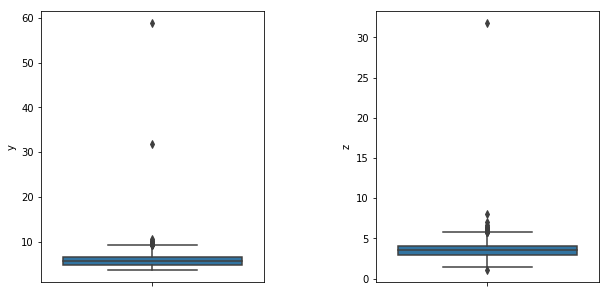

In [38]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [39]:
#your code here

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,5.0,4.0,61.8,54.7,1970.0,5.12,5.15,31.8


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [40]:
#your code here

Let's check if we actually corrected the outlier.

In [42]:
diamonds.loc[48410]

carat           0.51
cut        Very Good
color              5
clarity            4
depth           61.8
table           54.7
price           1970
x               5.12
y               5.15
z               3.17
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

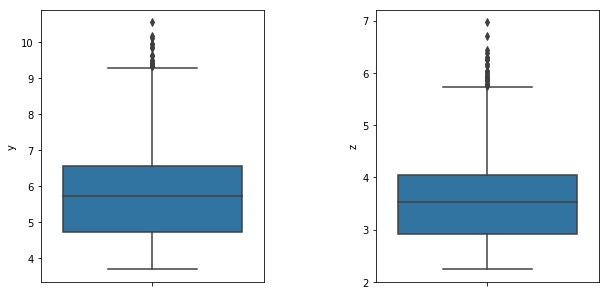

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [61]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [62]:
#your code here